# Simulation using Python 2
### Monte Carlo Simulation
[Numpy Random website](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

In [1]:
#Runs these import commands
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

**Scenario M1: Estimate PI**

Consider a quarter circle inscribed inside a unit square.  Radius of cirle is 1.

$Area_{quartercircle} = \pi /4$ and $Area_{square} = 1$

Now, suppose we randomly sample points, then $Area_{quartercircle} \approx \text{number_of_points_inside_circle}$

$\pi = 4*$ number_of_points_inside_circle / n


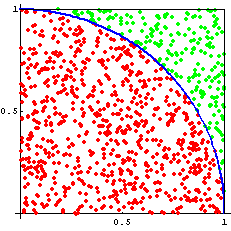


**Algorithm:**
```
for i in range(n):
  Generate x ~ Unif[0,1]
  Generate Y ~ Unif[0,1]
  if (x^2 + y^2) <=1:
    count_in_circle =  count_in_circle + 1

Estimate PI as 4*count_in_circle/n
```

In [ ]:
#Write your code here
n=10000
count_in_circle=0
for i in range(n):
  if ((rnd.uniform(0,1))**2 + (rnd.uniform(0,1))**2 <=1):
    count_in_circle =  count_in_circle + 1

print(4*count_in_circle/n)

3.1496


**Scenario M2** A project consists of three tasks: A, B and C. Task A and B can be done in parallel, while C can being only after A and B are completed. The time for task A, is exponentially distributed with mean 10 hours; the time for task B is uniformly distributed between 6 and 14 hours; and the time for task C, is normally distributed with mean 10 hours and std. dev. 3.
What is the probability that the project will be completed within 22 hours?

*Algorithm*
```
for i in range(n):
  Generate A ~ Expo(mean=10 hours)
  Generate B ~ Unif[6, 14]
  Generate C ~ Normal(mean=10, s.d=3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1
 
Estimate Probability as count /n
```

In [ ]:
#Write your code here
n=500
count = 0
for i in range(n):
  A = rnd.exponential(10)
  B = rnd.uniform(6, 14)
  C = rnd.normal(10,3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1

print(count/n)

0.476


**Scenario M3**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is
Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.

(a) Estimate the probability that the rat dies by poison.

(b) What is the expected duration the rat lives?

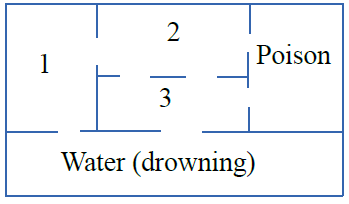

*Algorithm*
```
durations=[]
Poisoncount = 0

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timespent=0.0
  while (currentCell not in [4, 5]):
    timespent = timespent + Gamma(4,3*currentCell)
    if currentCell == 1:
      #choose cell 1 or 5 randomly  #5 can indicate Water cell
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
    else: #currentCell is 3
      #choose cell 2 or 4 or 5 
  
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  durations.append(timespent)

##print the results
```


In [2]:
durations=[]
Poisoncount=0
n=1000

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timespent=0.0
  while (currentCell not in [4, 5]):
    timespent = timespent + rnd.gamma(4,3*currentCell)
    if currentCell == 1:
      #choose cell 2 or 5 randomly  #5 can indicate Water cell
      currentCell = rnd.choice([2,5])
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
      currentCell = rnd.choice([1,3,3,4])
    else: #currentCell is 3
      #choose cell 2 or 4 or 5 
      currentCell = rnd.choice([2,2,4,5])

    if currentCell == 4:
      Poisoncount = Poisoncount+1
  durations.append(timespent)

## print the results
print(durations)
print("Mean Duration (Expected Duration the rat lives)=",np.mean(durations))
print("Min Duration=",np.min(durations))
print("Max Duration=",np.max(durations))
print("Average probability of rat dying by poison",Poisoncount/n)


[36.577501699213926, 59.092028927826505, 7.917381060467131, 6.328696874753238, 235.18756946520082, 142.40762914778045, 9.195985286270652, 32.81996043518173, 10.987852627826555, 8.050593302255603, 20.73692907818478, 10.703068658494592, 9.308108146937032, 70.88203428019531, 9.430038453533953, 99.55044042177644, 5.955307974447625, 8.692766213289525, 82.85092431317312, 120.98869173158361, 9.87469927944835, 48.19852011441064, 6.557325154041475, 87.60794724641352, 4.252070780061418, 17.49010299662644, 11.787667106659995, 8.803936782913778, 66.01983522085608, 11.06722494114543, 63.6743434452758, 12.975186910818739, 6.763592847990736, 30.13060432838051, 20.412907781834633, 125.66375136547356, 34.94012959845672, 72.81158772044682, 154.34521922958464, 10.249831159146282, 75.4018587465723, 24.052757127689237, 12.510095274948025, 3.1832606244023074, 10.23909867827962, 164.7390842007715, 10.431854220819833, 8.78913002567128, 9.376179628381244, 6.108330675539024, 12.18546946336808, 6.705551111329981

**Exercise**

Newspaper vendor at a railway station buys newspaper at Rs. 3.50 and sells it at Rs.4.50. At the end of the day, the unsold newspapers are sold to raddhiwala for Rs.0.25. Estimate the expected profit if the vendor buys 40 newspapers.

Compare the results when:

*   Demand for newspaper is Poisson random variable with mean 50
*   Demand for newspaper is Normal random variable with mean 50 & s.d. 5

In [4]:
n=1000
d1=[]
d2=[]
profit1=[]
profit2=[]
for i in range(n):
  d1.append(rnd.poisson(50))
  d2.append(rnd.normal(50,5))
print(d1)
print(d2)

[49, 67, 53, 43, 59, 57, 51, 42, 50, 60, 62, 55, 44, 46, 50, 52, 50, 52, 60, 56, 45, 33, 50, 47, 45, 39, 52, 47, 63, 54, 52, 46, 56, 56, 36, 50, 46, 45, 55, 59, 42, 57, 48, 48, 61, 45, 51, 66, 37, 39, 47, 41, 48, 45, 43, 51, 45, 58, 40, 53, 50, 49, 55, 56, 52, 52, 50, 57, 53, 59, 49, 47, 48, 52, 54, 47, 73, 49, 37, 34, 31, 45, 62, 56, 35, 61, 52, 49, 44, 44, 57, 46, 40, 59, 50, 59, 41, 51, 42, 66, 40, 45, 55, 49, 54, 58, 45, 59, 40, 56, 53, 58, 51, 75, 51, 58, 52, 53, 42, 47, 58, 50, 43, 52, 48, 49, 59, 48, 53, 52, 52, 50, 40, 59, 51, 61, 50, 47, 41, 46, 62, 47, 48, 53, 43, 38, 50, 48, 56, 44, 63, 60, 41, 46, 59, 55, 58, 42, 56, 43, 61, 50, 58, 51, 56, 42, 52, 56, 39, 53, 47, 47, 37, 52, 43, 44, 52, 56, 44, 45, 40, 47, 43, 53, 52, 37, 53, 41, 42, 45, 58, 55, 48, 41, 44, 58, 40, 54, 48, 43, 51, 51, 39, 50, 46, 47, 59, 38, 39, 46, 41, 47, 45, 41, 35, 42, 38, 53, 54, 51, 48, 50, 51, 54, 54, 40, 48, 47, 58, 61, 42, 54, 30, 52, 50, 54, 63, 56, 34, 56, 56, 63, 52, 55, 60, 47, 62, 53, 47, 61,

(array([  7.,  35., 126., 146., 269., 223., 120.,  61.,   9.,   4.]),
 array([28. , 32.7, 37.4, 42.1, 46.8, 51.5, 56.2, 60.9, 65.6, 70.3, 75. ]),
 <a list of 10 Patch objects>)

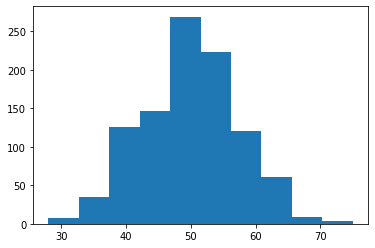

In [5]:
plt.hist(d1)

(array([  9.,  35.,  94., 182., 223., 206., 150.,  68.,  27.,   6.]),
 array([35.61085887, 38.63790695, 41.66495502, 44.6920031 , 47.71905117,
        50.74609925, 53.77314732, 56.8001954 , 59.82724347, 62.85429155,
        65.88133962]),
 <a list of 10 Patch objects>)

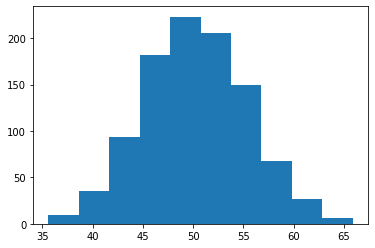

In [6]:
plt.hist(d2)

In [7]:
for i in range(n):
  profit1.append(min(d1[i],40)-max(40-d1[i],0)*3.25)
  profit2.append(min(d2[i],40)-max(40-d2[i],0)*3.25)
print(profit1)
print(profit2)

[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 10.25, 40.0, 40.0, 40.0, 35.75, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 23.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 27.25, 35.75, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 27.25, 14.5, 1.75, 40.0, 40.0, 40.0, 18.75, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 31.5, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.

Expected profit when demand for newspaper is Poisson random variable with mean 50= 38.929


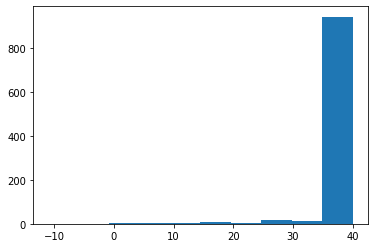

In [8]:
plt.hist(profit1)
print("Expected profit when demand for newspaper is Poisson random variable with mean 50=", np.mean(profit1))

Expected profit when demand for newspaper is Normal random variable with mean 50 & s.d. 5= 39.88456600681155


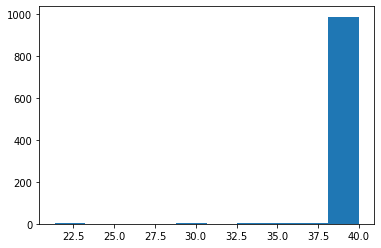

In [9]:
plt.hist(profit2)
print("Expected profit when demand for newspaper is Normal random variable with mean 50 & s.d. 5=",np.mean(profit2))

We can observe that expected profit for both is almost 40 but it is less when demand ~ Poisson(50) than when demand ~ Normal(50,5). This might be because the number of observations where demand>=40 is less when demand ~ Poisson(50) than when demand ~ Normal(50,5).